In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
## for debugging:
# %aimport hmm
%autoreload 2
%matplotlib inline

In [7]:
data_dir = os.path.join('.','data')

ref = pd.read_excel(os.path.join(data_dir, 'GroundTruths.xlsx'), 
                    names=['file', 'date_time'])
ref.date_time = pd.to_datetime(ref.date_time)
# sns.rugplot(ref['event DateTime'])
# with sns.axes_style(style='darkgrid'):
#     plt.figure(figsize=(12,1))
#     sns.stripplot(x=ref['date_time'], y=ref['file'],
#                  orient='h')# ref
#     plt.xticks(rotation=15)
#     plt.title('Anomalous Events')

In [8]:


# if not os.path.isfile(os.path.join(data_dir, 'completeDB.csv')):
#     print('reading in...')
#     df = pd.concat([pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), 
#                                  index_col=0, parse_dates=True),
#                     pd.read_csv(os.path.join(data_dir, 'data_7600.csv'), 
#                                  index_col=0, parse_dates=True),
#                     pd.read_csv(os.path.join(data_dir, 'data_7664.csv'), 
#                                  index_col=0, parse_dates=True)])
#     print('creating h5...')
#     df.to_hdf(os.path.join(data_dir, 'completeDB.h5'))
#     print('done!')
# else:
#     print('reading h5...')
#     df = pd.read_csv(os.path.join(data_dir, 'completeDB.csv'), index_col=0)
#     print('done!')
df = pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), index_col=0)


In [9]:
df.head()

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
4/1/2010 0:01,0.0,0.0,61.5508,68.6880,69.3622,69.6943,69.2811,69.1613,68.9111,68.9601,...,68.9846,67.9353,69.9003,69.6597,68.4944,70.4803,70.2361,69.0025,71.2369,70.7852
4/1/2010 0:02,0.0,0.0,61.5484,68.6872,69.3614,69.6929,69.2799,69.1613,68.9098,68.9595,...,68.9867,67.9348,69.9006,69.6606,68.4947,70.4810,70.2352,69.0017,71.2356,70.7840
4/1/2010 0:03,0.0,0.0,61.5460,68.6864,69.3606,69.6915,69.2787,69.1613,68.9085,68.9589,...,68.9887,67.9343,69.9010,69.6615,68.4951,70.4818,70.2343,69.0009,71.2343,70.7828
4/1/2010 0:04,0.0,0.0,61.5437,68.6856,69.3597,69.6900,69.2776,69.1614,68.9073,68.9583,...,68.9907,67.9337,69.9014,69.6624,68.4955,70.4825,70.2334,69.0001,71.2331,70.7815
4/1/2010 0:05,0.0,0.0,61.5413,68.6848,69.3589,69.6886,69.2764,69.1614,68.9060,68.9576,...,68.9927,67.9332,69.9017,69.6633,68.4959,70.4832,70.2325,68.9994,71.2318,70.7803


In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_n = scale.fit_transform(df.values)
df_n = pd.DataFrame(data=df_n, index=df.index, columns=df.columns)

# ddf = dd.from_pandas(df, npartitions=3)

# def scale(df):
#     return (df-df.mean()).div(df.std())
# ddf.map_partitions(scale)
# ddf.div()
# scale = ddf.sub(ddf.mean(axis=0).compute()).div(ddf.std(axis=0))
# df_n = scale.compute()
df_n.head()
# df.T_1.plot(kind='kde')

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
4/1/2010 0:01,-0.04247,-0.064198,0.000755,-0.452382,-0.456538,-0.475757,-0.452896,-0.458635,-0.456171,-0.457126,...,-0.447052,-0.454683,-0.454825,-0.454370,-0.446376,-0.453965,-0.458338,-0.452819,-0.427404,-0.477990
4/1/2010 0:02,-0.04247,-0.064198,0.000753,-0.452383,-0.456539,-0.475758,-0.452897,-0.458635,-0.456172,-0.457127,...,-0.447050,-0.454684,-0.454824,-0.454370,-0.446376,-0.453965,-0.458339,-0.452819,-0.427405,-0.477991
4/1/2010 0:03,-0.04247,-0.064198,0.000751,-0.452383,-0.456540,-0.475759,-0.452898,-0.458635,-0.456173,-0.457127,...,-0.447049,-0.454684,-0.454824,-0.454369,-0.446375,-0.453964,-0.458339,-0.452820,-0.427406,-0.477992
4/1/2010 0:04,-0.04247,-0.064198,0.000749,-0.452384,-0.456540,-0.475760,-0.452898,-0.458635,-0.456174,-0.457128,...,-0.447047,-0.454685,-0.454824,-0.454368,-0.446375,-0.453963,-0.458340,-0.452820,-0.427407,-0.477993
4/1/2010 0:05,-0.04247,-0.064198,0.000746,-0.452385,-0.456541,-0.475762,-0.452899,-0.458635,-0.456175,-0.457128,...,-0.447045,-0.454685,-0.454823,-0.454367,-0.446375,-0.453963,-0.458341,-0.452821,-0.427408,-0.477994


In [11]:
# from dask import dataframe as dd
# from dask.multiprocessing import get


#use dask to set up the filter quickly
# ddf = dd.from_pandas(df_n, npartitions=5, name='scale_dask_data')
# mask = (ddf.abs() < 3.)
# mask.shape[0] - mask.any(axis=1).sum()
# dfo = df_n[mask.any(axis=1).compute().values]
dfo = df_n[df_n.abs()<3]
dfo.index = pd.to_datetime(dfo.index)
# dfo.shape, df_n.shape

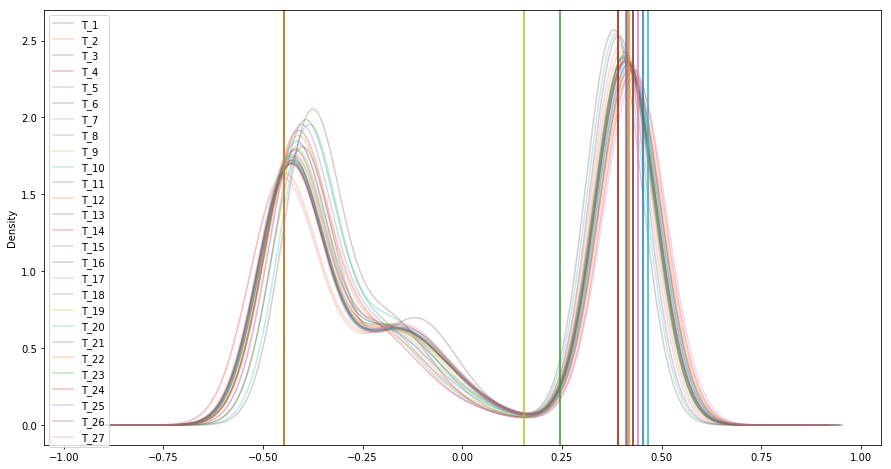

In [12]:
dfr = dfo.resample('1h').mean()
dfr.loc[:,'T_1':].plot(kind='kde', alpha=.3, figsize=(15,8))
# df_n.T_1.plot(kind='hist', bins=50)

cols = sns.color_palette(n_colors=ref.shape[0])

for n,t in enumerate(ref.date_time.values):
#     plt.vlines(dfo.iloc[dfo.index.get_loc(t, method='nearest')], 0, 2.5, color=cols[n], alpha=.2)
    plt.axvline(dfo.iloc[dfo.index.get_loc(t, method='nearest')].median(), color=cols[n])

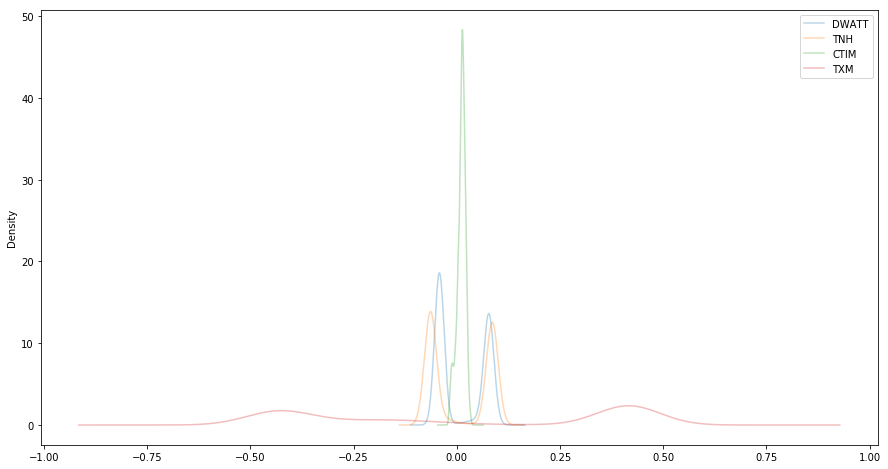

In [13]:
dfr.loc[:,:'TXM'].plot(kind='kde', alpha=.3, figsize=(15,8))

In [14]:
target = pd.Series(index=dfo.index, data=0)
target[np.isin(dfo.index,ref.date_time)] = 1


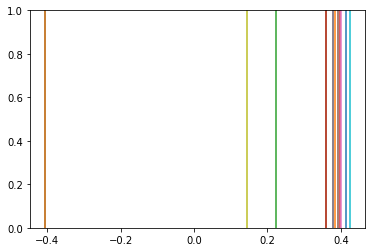

In [15]:
mask = (dfo.index-dfo.index.shift(-1, freq='60s')) == np.timedelta64(0,'60s')

cols = sns.color_palette(n_colors=ref.shape[0])

for n,t in enumerate(ref.date_time.values):
#     plt.vlines(dfo.iloc[dfo.index.get_loc(t)], 0, 2.5, color=cols[n])
    plt.axvline(dfo.iloc[dfo.index.get_loc(t, method='nearest')].mean(), color=cols[n])


In [16]:
from pomegranate import *

ndim = dfo.shape[1]

mu = np.arange(ndim)
cov = np.eye(ndim)

# mgs = [ MultivariateGaussianDistribution( mu*i, cov ) for i in range(4) ]
mgs = [ NormalDistribution(-.5, .1), NormalDistribution(-.1, .1), NormalDistribution(.5, .1)]

gmm = GeneralMixtureModel( mgs )
# hmm = HiddenMarkovModel()
gmm

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                -0.5,
                0.1
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                -0.1,
                0.1
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                0.5,
                0.1
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        -1.0986122886681098,
        -1.0986122886681098,
        -1.0986122886681098
    ]
}

In [17]:
gmm.fit(dfr.T_2.values, verbose=True, stop_threshold=1)

[1] Improvement: 3611.9320779171785	Time (s): 0.0005941
[2] Improvement: 289.3498166296836	Time (s): 0.0005853
[3] Improvement: 136.8169332050311	Time (s): 0.0006015
[4] Improvement: 51.95956065410519	Time (s): 0.0006874
[5] Improvement: 23.26840897859165	Time (s): 0.001544
[6] Improvement: 12.922205301942995	Time (s): 0.001596
[7] Improvement: 8.336468848244294	Time (s): 0.001584
[8] Improvement: 6.249256384813634	Time (s): 0.00154
[9] Improvement: 5.344263450354902	Time (s): 0.001536
[10] Improvement: 5.110588667330376	Time (s): 0.001592
[11] Improvement: 5.396882789796109	Time (s): 0.001767
[12] Improvement: 6.256179515991789	Time (s): 0.001564
[13] Improvement: 7.934447854254358	Time (s): 0.0006902
[14] Improvement: 10.918197596476148	Time (s): 0.0006382
[15] Improvement: 15.818959815354447	Time (s): 0.0006442
[16] Improvement: 22.254164713710452	Time (s): 0.0007179
[17] Improvement: 26.28952258299796	Time (s): 0.0006647
[18] Improvement: 23.37514170522445	Time (s): 0.0006433
[19] 

4394.595958768048

In [18]:
gmm.distributions

array([ {
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        -0.4701966786760749,
        0.00573446482121048
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        -0.24068145521652282,
        0.18658588674373866
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        0.42532689827543124,
        0.009681931785956914
    ],
    "frozen" :false
}], dtype=object)

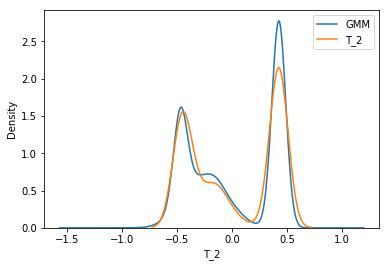

In [19]:
pd.DataFrame(np.array(gmm.sample(10000))).plot(kind='kde', label='GMM')
sns.distplot(dfr.T_2, hist=False, label='T_2')
plt.legend(['GMM', 'T_2'])

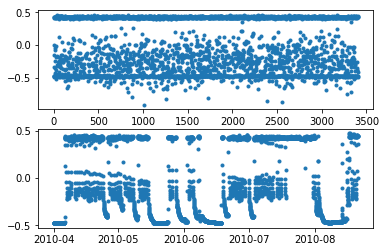

In [20]:
plt.subplot(211)
plt.plot(np.array(gmm.sample(3408)), '.')
plt.subplot(212)
plt.plot(dfr.T_2, '.')


d1 = gmm.distributions[0]
d2 = gmm.distributions[1]
d3 = gmm.distributions[2]

s1 = State(d1, 'b')  # background
s2 = State(d2, 't')  # transition
s3 = State(d3, 'a')  # active

hmm = HiddenMarkovModel('sys-modeler')
hmm.add_states(s1, s2, s3)
hmm.add_transition(hmm.start, s1, 1.)
hmm.add_transition(s1, s1, .5)  # stays off
hmm.add_transition(s1, s2, .5)  # starts
hmm.add_transition(s2, s2, .2)  # still starting
hmm.add_transition(s2, s3, .4)  # to active
hmm.add_transition(s3, s3, .8)  # stays active
hmm.add_transition(s3, s2, .2)  # done
hmm.add_transition(s2, s1, .4)  # off

hmm.bake()

int_seq = gmm.predict(dfr.T_2.values.reshape(-1,1))
state_seq = [{0:'b', 1:'t', 2:'a'}[i] for i in int_seq]
hmm.fit([dfr.T_3.values])


In [21]:
# dists = 27*[NormalDistribution(2,3)]

# model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, 
#                                        n_components=3, 
#                                        X=[dfr.loc[:,'T_1':].values[:1000]])
model = HiddenMarkovModel.from_samples(NormalDistribution, 
                                       n_components=7, 
                                       X=[dfr['T_13'].values], 
                                       verbose=True, 
                                       n_jobs=6)
# model

[1] Improvement: 5738.720423394801	Time (s): 0.01762
[2] Improvement: 256.73965636439425	Time (s): 0.02489
[3] Improvement: 114.18991592908606	Time (s): 0.01724
[4] Improvement: 51.810832065793875	Time (s): 0.02306
[5] Improvement: 24.4999523243132	Time (s): 0.02409
[6] Improvement: 14.782940716040684	Time (s): 0.0261
[7] Improvement: 13.623638990757172	Time (s): 0.01699
[8] Improvement: 19.50871806590294	Time (s): 0.02341
[9] Improvement: 30.641100681054013	Time (s): 0.02789
[10] Improvement: 38.1708912433769	Time (s): 0.01867
[11] Improvement: 18.735314088888117	Time (s): 0.02628
[12] Improvement: 15.955082593414772	Time (s): 0.01717
[13] Improvement: 12.530673879586175	Time (s): 0.02456
[14] Improvement: 14.884107834795941	Time (s): 0.02666
[15] Improvement: 13.063459395034442	Time (s): 0.01607
[16] Improvement: 13.09530829747382	Time (s): 0.016
[17] Improvement: 15.328741397865087	Time (s): 0.01598
[18] Improvement: 21.086126040898307	Time (s): 0.01922
[19] Improvement: 29.88030014

(-0.6, 0.6)

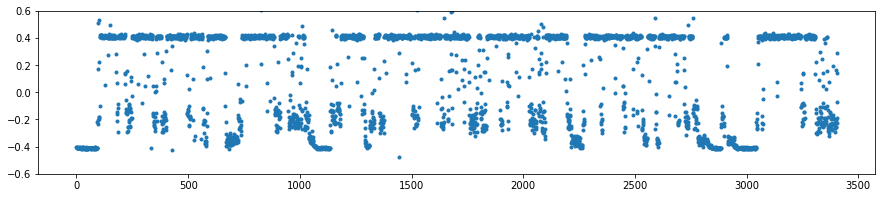

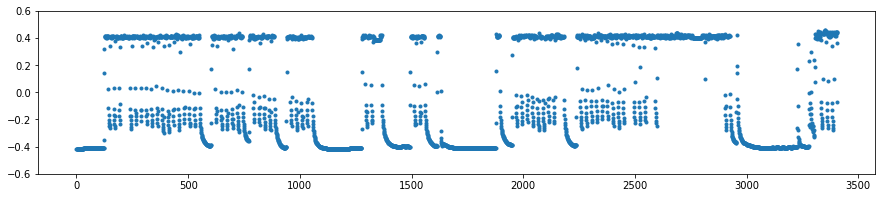

In [22]:
# plt.subplot(211)
plt.figure(figsize=(15,3))
plt.plot(np.array(model.sample(3408)), '.')
# plt.subplot(212)
plt.ylim(-.6, .6)
plt.figure(figsize=(15,3))
plt.plot(dfr.T_13.values, '.')
plt.ylim(-.6, .6)

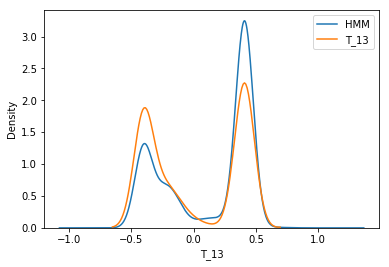

In [23]:
pd.DataFrame(np.array(model.sample(3408))).plot(kind='kde', label='HMM')
sns.distplot(dfr.T_13, hist=False, label='T_13')
plt.legend(['HMM', 'T_13'])

In [24]:
model.log_probability(dfr['T_13'].values)

9916.65976657331

(0.0, 10)

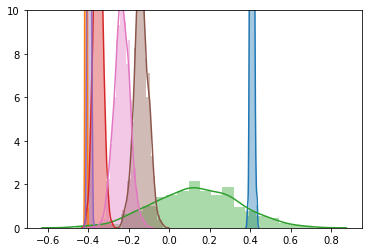

In [25]:
for dist in model.states[:7]:
    sns.distplot(dist.distribution.sample(1000), norm_hist=True)
plt.ylim(ymax=10)

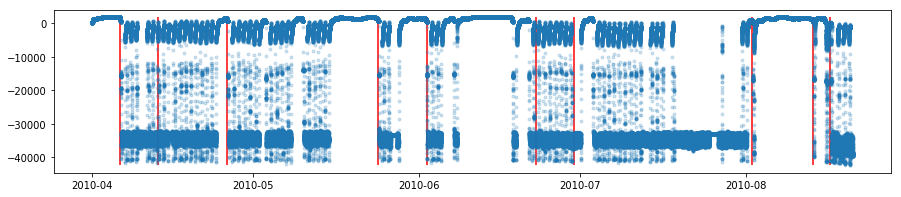

/home/tbsexton/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/home/tbsexton/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


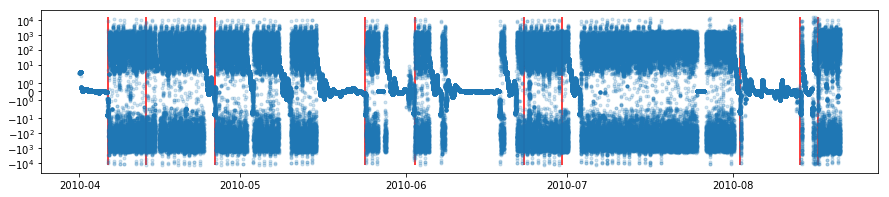

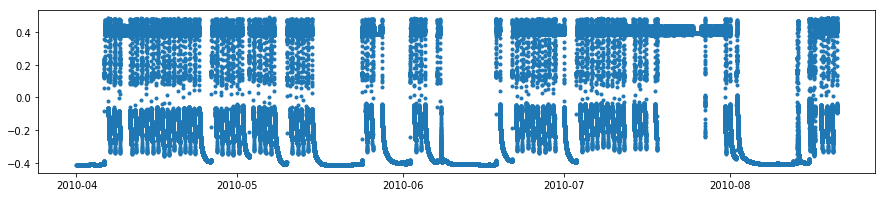

In [26]:
r = dfo.rolling('6h')  # result at right-edge of window. 
lprob = r.T_13.apply(model.log_probability)
# dprob = np.diff(lprob.values, n=2)  #1st-order 2nd der
dprob = pd.Series(np.gradient(lprob), index=lprob.index)  #1st-order 2nd der

plt.figure(figsize=(15,3))
plt.plot(lprob , '.', alpha=.2)
plt.vlines(ref[ref.file==6302].date_time.values, lprob.min(), lprob.max(), color='r')

plt.figure(figsize=(15,3))
# plt.plot(lprob.index[2:], dprob , '.', alpha=.2)
plt.plot(dprob , '.', alpha=.2)
plt.vlines(ref[ref.file==6302].date_time.values, dprob.min(), dprob.max(), color='r')
plt.yscale('symlog')

plt.figure(figsize=(15,3))
plt.plot(dfo.T_13, '.')

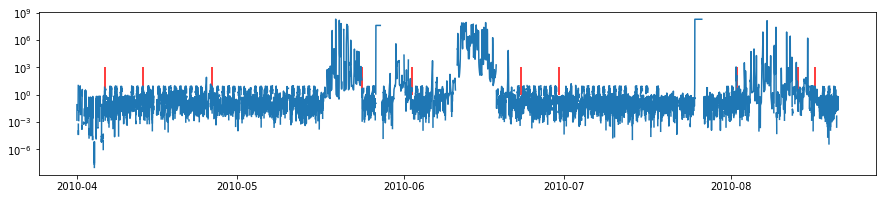

In [27]:
plt.figure(figsize=(15,3))
plt.semilogy(dprob.rolling(100).skew())
plt.vlines(ref[ref.file==6302].date_time.values, 1, 1e3, color='r')
# dprob.rolling('')


# TODO: anomalous REGIONS

# anom = lambda x: np.isin(x.index, ref.date_time).any()
# dfo.index.rolling('6h')
# anom()
# dfo.iloc[:10].index.values

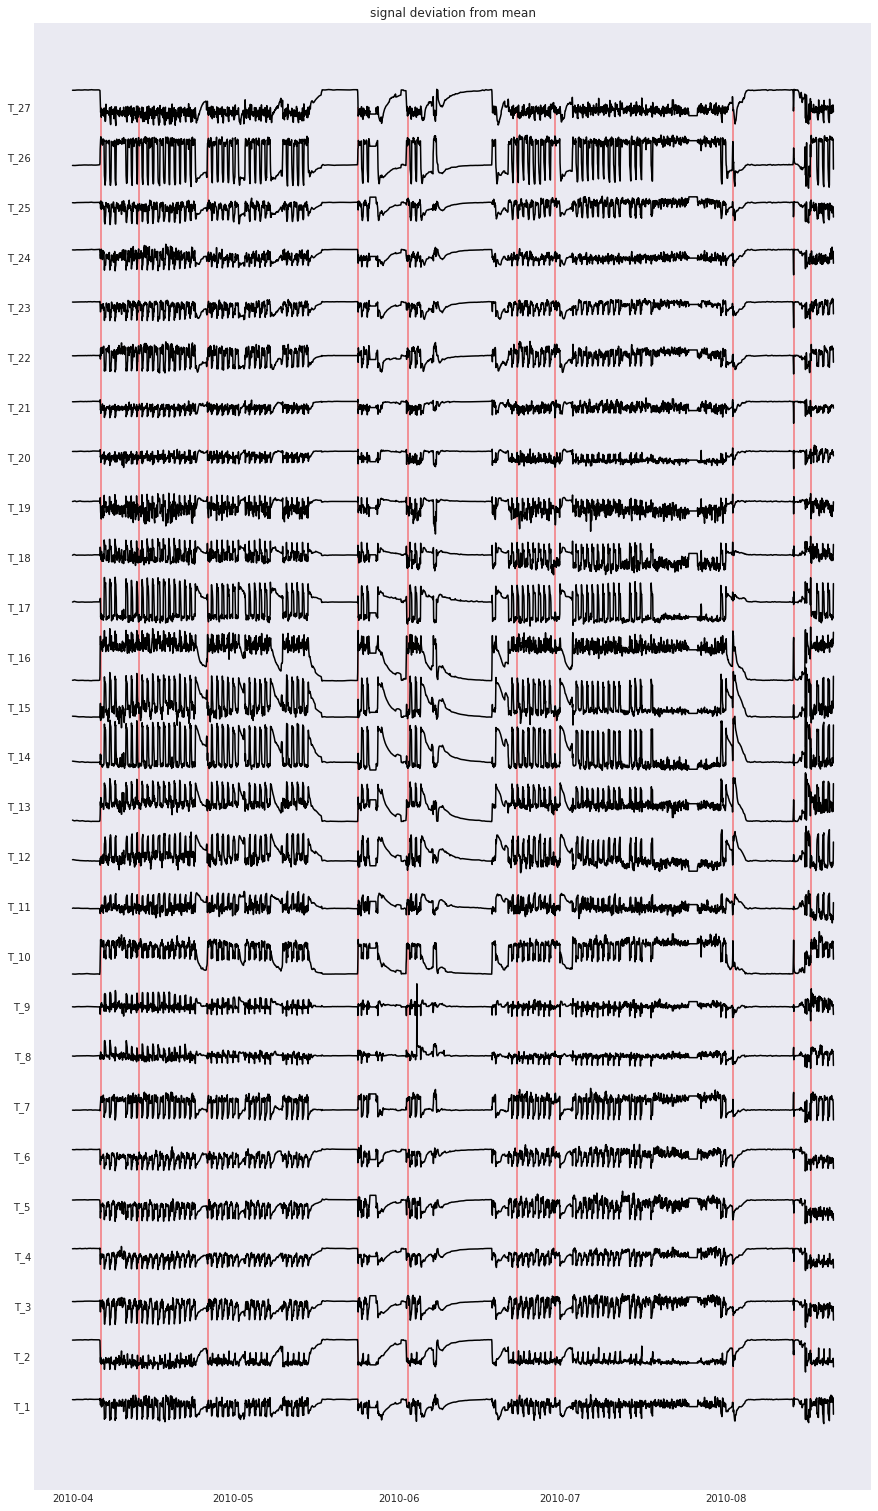

In [28]:
with sns.axes_style('dark'):
    plt.figure(figsize=(15,27))
    
    for i, (name, sig) in enumerate(dfr.loc[:,'T_1':].iteritems()):
        plt.plot(dfr.loc[:,'T_1':].mean(axis=1) - sig+0.1*i, 'k')
    plt.vlines(ref[ref.file==6302].date_time.values, 0, 2.6, color='r', alpha=.5)
    plt.title('signal deviation from mean')
    plt.yticks(np.arange(0,2.8, .1),dfr.loc[:,'T_1':].columns )
    
#     for i, (name, sig) in enumerate(dfr.iteritems()):
#         plt.plot(sig+i, 'k')
#     plt.vlines(ref[ref.file==6302].date_time.values, 0, 26, color='r', alpha=.5)
#     plt.title('signal')
#     plt.yticks(np.arange(0,31),dfr.columns )

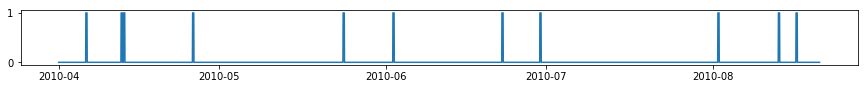

In [29]:
target = pd.Series(index=dfr.index, data=0)
for n,t in ref.date_time.iteritems():
    start_date= t-pd.Timedelta(hours=6)
    end_date = t
    mask = (dfr.index > start_date) & (dfr.index <= end_date)
    times=dfr[mask].index
    target.loc[times] = 1
plt.figure(figsize=(15,1))
plt.plot(target)

In [30]:
[(dfr.index > t-pd.Timedelta(hours=6))&(dfr.index<t) for t in ref.date_time]

[array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., 

In [31]:
# dfr.between_time((ref.date_time.iloc[0]-pd.Timedelta(hours=1)).time(), ref.date_time.iloc[0].time())

In [136]:
symbs = model.predict(dfr.T_13.values)

# norm = State( DiscreteDistribution({0:.5, 1: 0.4, 2:.1}), name="N" )
# anom = State( DiscreteDistribution({0:.1, 1:.2, 2:.7}), name="A" )

# lvlmod = HiddenMarkovModel()
# lvlmod.add_states( [norm, anom] )
# lvlmod.add_transition( model.start, norm, 0.5 )
# lvlmod.add_transition( model.start, anom, 0.5 )
# lvlmod.add_transition( norm, anom, 0.5 )
# lvlmod.add_transition( anom, norm, 0.5 )
# lvlmod.bake()

# lvlmod.fit([symbs], verbose=True, labels=[target.map({0:'N', 1:'A'})])

lvlmod = HiddenMarkovModel.from_samples(DiscreteDistribution, n_components=2, 
                                        X=[symbs], 
#                                         labels=[target.map({0:'N', 1:'A'})],
                                        labels=[target.values],
                                       verbose=True)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# target.map({0:'N', 1:'A'}).describe()
plt.plot(lvlmod.predict(symbs))

In [ ]:
pd.Series(index=target.index)

In [ ]:
# plt.plot(lvlmod.sample(1000))
# plt.plot(lvlmod.predict(symbs))
# target.plot()
labels = pd.DataFrame(target.map({0:'N', 1:'A'}))
labels['pred'] = lvlmod.predict(symbs)
labels.pred = labels.pred.map({0:'N', 1:'A'})
# labels.plot()


In [ ]:
labels.describe()

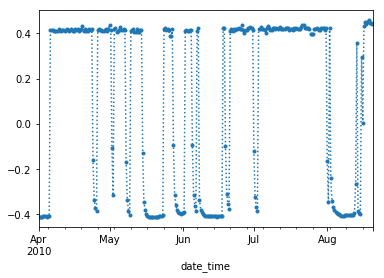

In [125]:
dfr.resample('12h').max().T_13.plot(linestyle=':', marker='.')

In [33]:
# from hmm import RollingHMM

mod = hmm.RollingHMM(dfr.T_13, 3, ref.date_time)

AttributeError: module 'pomegranate.hmm' has no attribute 'RollingHMM'

In [157]:
# r_t13 = dfr.T_13.rolling(mod.window)

# r_t13.apply(mod.rolling_store)

mod.fit()

AttributeError: 'RollingHMM' object has no attribute 'fit'

In [140]:
import itertools.compress

mod.sequences

[array([-0.41683018]),
 array([-0.41683018, -0.41669888]),
 array([-0.41683018, -0.41669888, -0.41656391]),
 array([-0.41683018, -0.41669888, -0.41656391, -0.41642895]),
 array([-0.41683018, -0.41669888, -0.41656391, -0.41642895, -0.41629398]),
 array([-0.41683018, -0.41669888, -0.41656391, -0.41642895, -0.41629398,
        -0.41615902]),
 array([-0.41669888, -0.41656391, -0.41642895, -0.41629398, -0.41615902,
        -0.41602405]),
 array([-0.41656391, -0.41642895, -0.41629398, -0.41615902, -0.41602405,
        -0.41588908]),
 array([-0.41642895, -0.41629398, -0.41615902, -0.41602405, -0.41588908,
        -0.41579317]),
 array([-0.41629398, -0.41615902, -0.41602405, -0.41588908, -0.41579317,
        -0.41578478]),
 array([-0.41615902, -0.41602405, -0.41588908, -0.41579317, -0.41578478,
        -0.41577966]),
 array([-0.41602405, -0.41588908, -0.41579317, -0.41578478, -0.41577966,
        -0.41577454]),
 array([-0.41588908, -0.41579317, -0.41578478, -0.41577966, -0.41577454,
        -0